distancia: -1.0
dif: [7, 8]
d:7
d:8
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 4.5, 3.6666666666666665, 3.3333333333333335, 6.0]
[0, 0, 0, 0, 0, 0, 0.45, -0.15, -0.15, 0]


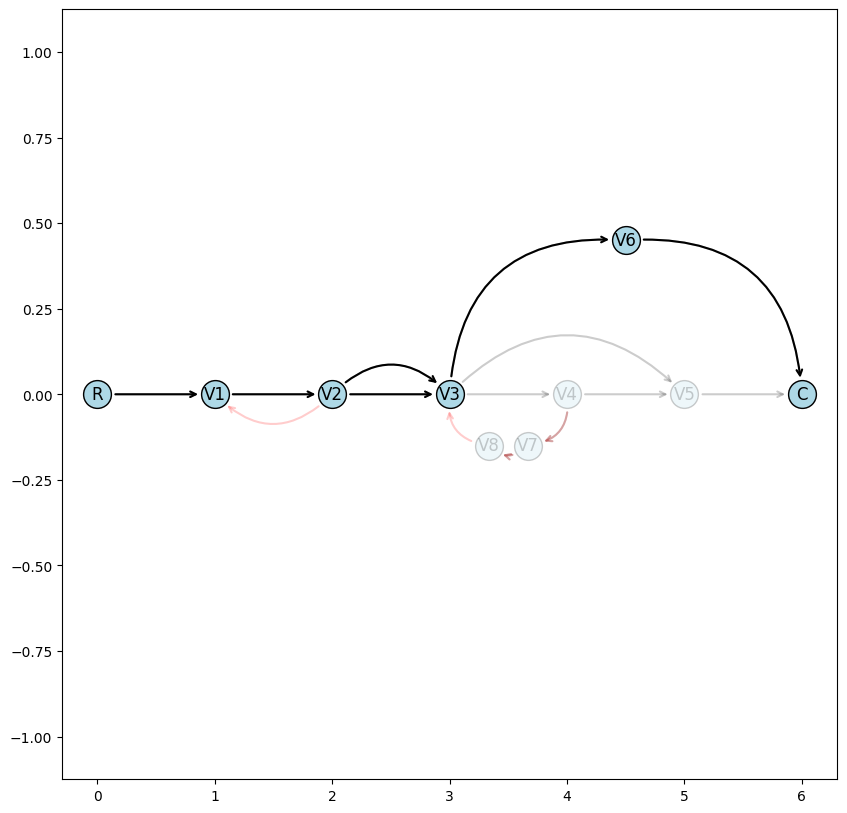

In [157]:
import matplotlib.pyplot as plt
from time import sleep
# from sistema import *

# Vai ser o len(matriz)
matriz = [
    #R  1  2  3  4  5  6  7  8  C
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], # R
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], # V1
    [0, 1, 0, 2, 0, 0, 0, 0, 0, 0], # v2 
    [0, 0, 0, 0, 1, 1, 1, 0, 0, 0], # v3
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0], # v4
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], # v5
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], # v6
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], # v7
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], # v8
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # C
]

'''
    Variáveis importantes para serem importadas do código principal:
        matriz = Matriz de adjacência // Trocar matriz por self.matriz resolve
        caminhos_frente = Vetor dos caminhos à frente // trocar por __encontra_caminho()
        ganhos_lacos = Vetor dos laços // trocar por __encontra_lacos()
'''

# Guarda o indice do maior caminho a frente 
# Entrada: __encontra_caminho()
caminhos_frente = [[0, 1, 2, 3, 4, 5, 9], [0, 1, 2, 3, 6, 9]]
# encontra o indice do maior comprimento
ignora = max(caminhos_frente, key=lambda caminho: len(caminho))
# encontra o tamanho do maior indice
max_len = len(ignora)
# conta a quantidade de caminhos de maior tamanho possuem
conta_caminhos = sum(1 for caminho in caminhos_frente if len(caminho) == max_len)

'''
    Como já tem as Keys no código principal, talvez não precise disso aqui
'''
# Cria os nós
nos = []
# Preenche os nós
for i in range(len(matriz)):
    # Nó R
    if i == 0:
        nos.append('R')
    # Nó C
    elif i == len(matriz) - 1:
        nos.append('C')
    # Nós V
    else:
        nos.append('V' + str(i))
#------------------------------------------------------------------------------------#
#----------------------------------- Pesos em X -------------------------------------#
# Inicializa as posições do eixo X em "-1":
pesos_x = len(matriz)*[-1]
# [-1,- 1,- 1, ..., -1]

# Define o maior caminho de frente como o caminho principal:
for index, value in enumerate(ignora):
    pesos_x[value] = float(index)   # posição X é equivalente ao índice no vetor
# [0, 1, 2, 3, 4, 5, -1, -1, -1, 6]

# Define posição do eixo X das ramificações do caminho de frente principal:
for index, value in enumerate(caminhos_frente):
    
    if value == ignora:
        continue
    
    # verifica os nós que não estão no caminho principal:
    dif = value.copy()
    for v in ignora:
        if v in dif:
            dif.pop(dif.index(v))

    if dif == list():
        continue
    
    # salva os nós do caminho principal que começa e termina a ramificação:
    for i, v in enumerate(value):
        if v == dif[0]:
            inicio = value[i-1]

        if v == dif[-1]:
            fim = value[i+1]

    # distância da coordenada X dos nós de início e fim da ramificação:
    distancia = pesos_x[fim] - pesos_x[inicio]
    deslocamento = distancia/(len(dif) + 1)
    for i, d in enumerate(dif):
        pesos_x[d] = pesos_x[inicio] + (deslocamento * (i+1))

# [[1, 2, 3, 4, 6, 1], [3, 4, 7, 3], [5, 9, 8, 5]]
# Vai ser os ganhos de laços
ganhos_lacos = [[3, 4, 7, 8, 3]]
qnt_lacos = len(ganhos_lacos)

# Define posição do eixo X dos laços:
for index, value in enumerate(ganhos_lacos):

    # verifica os nós que não estão no caminho principal:
    dif = value[:-1].copy() # remove o último nó
    for v in ignora:
        if v in dif:
            dif.pop(dif.index(v))

    if dif == list():
        continue
    
    # salva os nós do caminho principal que começa e termina a ramificação:
    for i, v in enumerate(value):
        if v == dif[0]:
            inicio = value[i-1]

        if v == dif[-1]:
            fim = value[i+1]

    # distância da coordenada X dos nós de início e fim do laço:
    distancia = pesos_x[fim] - pesos_x[inicio]
    deslocamento = distancia/(len(dif) + 1)
    for i, d in enumerate(dif):
        pesos_x[d] = pesos_x[inicio] + (deslocamento * (i+1))

#------------------------------------------------------------------------------------#
#----------------------------------- Pesos em Y -------------------------------------#
# Inicializa as posições do eixo Y em "None":
pesos_y = len(matriz)*[None]

# Aplica os pesos em Y
# Define posição Y do maior caminho de frente como 0:
for i in ignora:
    pesos_y[i] = 0
# [0, 0, 0, 0, 0, -1, -1, -1, 0]

# Define posição do eixo Y das ramificações do caminho de frente principal:
for value in caminhos_frente:
    
    if value == ignora:
        continue
    
    # verifica os nós que não estão no caminho principal:
    dif = value.copy()
    for v in ignora:
        if v in dif:
            dif.pop(dif.index(v))

    if dif == list():
        continue
    
    # salva os nós do caminho principal que começa e termina a ramificação:
    for i, v in enumerate(value):
        if v == dif[0]:
            inicio = value[i-1]

        if v == dif[-1]:
            fim = value[i+1]

    # distância da coordenada X dos nós de início e fim da ramificação:
    distancia = pesos_x[fim] - pesos_x[inicio]
    for d in dif:
        pesos_y[d] = round(0.15 * distancia, 2)

# Define posição do eixo Y dos laços:
for value in ganhos_lacos:

    # verifica os nós que não estão no caminho principal:
    dif = value[:-1].copy() # remove o último nó
    for v in ignora:
        if v in dif:
            dif.pop(dif.index(v))

    if dif == list():
        continue
    
    # salva os nós do caminho principal que começa e termina a ramificação:
    for i, v in enumerate(value):
        if v == dif[0]:
            inicio = value[i-1]

        if v == dif[-1]:
            fim = value[i+1]
    
    # distância da coordenada X dos nós de início e fim do laço:
    distancia = pesos_x[fim] - pesos_x[inicio]
    print(f'distancia: {distancia}')
    print(f'dif: {dif}')
    for d in dif:
        print(f'd:{d}')
        pesos_y[d] = round(0.15 * distancia, 2)

    # [3, 4, 7, 3]

    # dif[0] = 7
    # len(value) - 1 = 3
    # for i, v in enumerate(value):
    #     if v == dif[0] or i == len(value) - 1:
    #         continue

    #     c -= 1
    #     # ultimo = pesos_y[i]
    # pesos_y[dif[0]] = c / 2 # -0.75
    # c = 0.5
print(pesos_x)
print(pesos_y)
               
# # Caminho do mesmo tamanho do maior, porém com outros indices
# for index, value in enumerate(caminhos_frente):
#     if value == ignora or len(value) < max_len:
#         continue

#     dif = list(set(caminhos_frente[index]) - set(ignora))
#     if dif != None:
#         for i in dif:
#             pesos_y[i] == 1        
#------------------------------------------------------------------------------------#
#----------------------Cria o dicionário das posições--------------------------------#
pos = {}
for i in range(len(nos)):
    pos[nos[i]] = (pesos_x[i], pesos_y[i])
#------------------------------------------------------------------------------------#
#---------------------------Cria e plota os gráficos---------------------------------#


# Usuario escolhe o que vai ser mostrado:
# Se for uma realimentação escolhida
escolha = 1
transparencia = [1, 1]
# Se o usuário escolher mostrar uma realimentação:
# Fazer o usuário escolher qual vai ser a realimentação:
laco = 1 # Supondo a escolha do laço 1
caminho = 1 # Supondo a escolha do caminho 0

# [[0, 1, 2, 3, 5, 9], [0, 1, 2, 3, 4, 5, 9]]
def draw(vetor, valor):
    transparencia[0] = transparencia[0] / 5
    dep = vetor[valor]

    dep_d = dict()
    for value in dep:
        dep_d[nos[value]] = tuple([pesos_x[value], pesos_y[value]])
    
    # Plotando o caminho em destaque:
    draw_nodes(dep_d, 2, transparencia[1])
    draw_connections(dep, transparencia[1])
    
    # Plotando o fluxo completo:
    draw_nodes(pos, 1, transparencia[0])
    draw_connections([], transparencia[0])
    
    plt.show()


# Chama todas as funções bases:
def draw_graph():
    draw_nodes()
    draw_connections()
#------------------------------------------------------------------------------------#
#---------------------------Cria e plota os gráficos---------------------------------#

# Criar a figura e remove os eixos
fig, ax = plt.subplots(figsize=(len(matriz), len(matriz)))
limites = [abs(min(pesos_y)), abs(max(pesos_y))]
limite = max(limites)
plt.ylim(-limite*2.5, limite*2.5) # Colocar o menor e maior peso para y
# ax.set_axis_off()

def draw_arrow(ax, start, end, color='black', curvature=0, alpha=1): # Mudar a transparencia dependendo se vai ser mostrado algo ou não
        ax.annotate('', xy=end, xycoords='data', xytext=start, textcoords='data',
                    arrowprops=dict(arrowstyle="->", lw=1.5, color=color, shrinkA=13, shrinkB=12, connectionstyle=f"arc3,rad={curvature}", alpha=alpha))

# Desenha as linhas de conexão entre os vértices:
def draw_connections(vetor_foco = [], alpha = 1): 
    
    if len(vetor_foco) != 0:
        
        for index, value in enumerate(vetor_foco):
            if index == len(vetor_foco) - 1:
                continue
            
            for i in range(len(matriz)):
                if i == value:    # [1, 2, 7, 1]
                    j = vetor_foco[index + 1]
                    
                    num_conexoes = matriz[i][j]

                    # coordenadas dos vértices:
                    start = pos[nos[i]]
                    end = pos[nos[j]]
                    
                    for k in range(num_conexoes):
                        curvature = 0.0
                        
                        # adiciona uma curvatura para 'entrar' nas ramificação do caminho de frente:
                        if k != 0 or abs(start[0] - end[0]) > 1 or ((i in ignora) ^ (j in ignora)) or ((start[0] - end[0]) > 0):
                            curvature = -0.5 if abs(start[0] - end[0]) > 0 else 0
                            if k > 1:
                                curvature = -0.5 * k
                    
                        # Definindo as cores das conexões:
                        if j > i:   # triângulo superior
                            color='black' # Ligação para caminho a frente
                            draw_arrow(ax, start, end, color, curvature=curvature, alpha=alpha) # Colocar a transparencia

                        if i > j or start[0] > end[0]:  # o triângulo inferior
                            color='red' # Ligação para realimentação
                            draw_arrow(ax, start, end, color, curvature=curvature, alpha=alpha) # Colocar a transparência

    else:
        # Varredura das conexões por todos os vértices:
        for i in range(len(matriz)):
            for j in range(len(matriz)):
                
                if matriz[i][j] == 0:   # não tem conexão
                    continue
                
                num_conexoes = matriz[i][j]

                # coordenadas dos vértices:
                start = pos[nos[i]]
                end = pos[nos[j]]
                

                for k in range(num_conexoes):
                    curvature = 0.0
                    
                    # adiciona uma curvatura para 'entrar' nas ramificação do caminho de frente:
                    if k != 0 or abs(start[0] - end[0]) > 1 or ((i in ignora) ^ (j in ignora)) or ((start[0] - end[0]) > 0):
                        curvature = -0.5 if abs(start[0] - end[0]) > 0 else 0
                        if k > 1:
                            curvature = -0.5 * k

                    # Definindo as cores das conexões:
                    if j > i:   # triângulo superior
                        color='black' # Ligação para caminho a frente
                        draw_arrow(ax, start, end, color, curvature=curvature, alpha=alpha) # Colocar a transparencia

                    if i > j or start[0] > end[0]:  # o triângulo inferior
                        color='red' # Ligação para realimentação
                        draw_arrow(ax, start, end, color, curvature=curvature, alpha=alpha) # Colocar a transparência
    
# Desenha os nós
def draw_nodes(dict, zorder, alpha):
    for label, (x, y) in dict.items():
        ax.scatter(x, y, s=400, color='lightblue', edgecolor='black', zorder=zorder, alpha=alpha)  # Ponto do nó => O alpha define a
        ax.text(x, y, label, ha='center', va='center', fontsize=12, zorder=zorder, alpha=alpha)  # Rótulo do nó

# laco = 2
draw(caminhos_frente, 1)
# draw_laco(laco)
# draw_caminho_a_frente(caminho)
# draw_graph()

In [ ]:
def draw_caminho_a_frente(caminho):
    transparencia[0] = transparencia[0] / 5
    dep = caminhos_frente[caminho]

    for index, value in enumerate(dep):
        ax.scatter(pesos_x[value], pesos_y[value], s=400, color='lightblue', edgecolor='black', zorder=1, alpha=transparencia[1])
        ax.text(pesos_x[value], pesos_y[value], nos[value], ha='center', va='center', fontsize=12, zorder=1, alpha=transparencia[1])

    for index, value in enumerate(dep):
        if index != len(dep) - 1:
            for i in range(len(matriz)):
                if i == value:
                    j = dep[index + 1]
                    # for j in range(len(matriz)):
                        # Desenha de acordo com a leitura da matriz de adjacência superior
                    if matriz[i][j] >= 1: #and j > i:
                        start = pos[nos[i]]
                        end = pos[nos[j]]
                        curvature = -0.5 if abs(start[0] - end[0]) > 1 else 0  # Desenha as ligações para os nós de caminho a frente
                        if i < len(matriz) - 2:
                            if start[0] <= end[0]:
                                color='black' # Ligação para caminho a frente
                            draw_arrow(ax, start, end, color, curvature=curvature, alpha=transparencia[1]) # Colocar a transparencia
    draw_graph()


def draw_laco (laco):
    transparencia[0] = transparencia[0] / 5
    dep = ganhos_lacos[laco]

    for index, value in enumerate(dep):
        # if index != len(dep) - 1:
        ax.scatter(pesos_x[value], pesos_y[value], s=400, color='lightblue', edgecolor='black', zorder=1, alpha=transparencia[1])
        ax.text(pesos_x[value], pesos_y[value], nos[value], ha='center', va='center', fontsize=12, zorder=1, alpha=transparencia[1])

    for index, value in enumerate(dep):
        if index != len(dep) - 1:
            for i in range(len(matriz)):
                if i == value:    # [1, 2, 7, 1]
                    j = dep[index + 1]
                    # for j in range(len(matriz)):
                    if matriz[i][j] >= 1:
                        start = pos[nos[i]]
                        end = pos[nos[j]]
                        curvature = -0.5 if abs(start[0] - end[0]) > 1 else 0  # Desenha as ligações para os nós de caminho a frente
                        # Desenha de acordo com a leitura da matriz de adjacência superior
                        if j > i:
                            if i < len(matriz) - 2:
                                if start[0] <= end[0]:
                                    color='black' # Ligação para caminho a frente
                                else:
                                    color='red' # Ligação para realimentação
                                draw_arrow(ax, start, end, color, curvature=curvature, alpha=transparencia[1]) # Colocar a transparencia
                        # Desenha de acordo com a leitura da matriz de adjacência inferior
                        if i > j:
                            if start[0] <= end[0]:
                                color='black' # Ligação para caminho a frente
                            else:
                                color='red' # Ligação para realimentação
                            draw_arrow(ax, start, end, color, curvature=curvature, alpha=transparencia[1]) # Colocar a transparência
    draw_graph()